# Integrantes

Numero de Cuenta-Nombre

20211021557-Erick Josue Sosa Aleman 

20221001175-Jose Francisco Vargas Carrasco

In [16]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.stats import chi2_contingency



# Leer Dataset

In [3]:
#Enlace del dataset original
#https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset

dataset=pd.read_csv("Dataset/Churn_Modelling.csv")

dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Limpieza de Datos


Eliminar la columna RowNumber que es Redundante al ya tener CustomerID

In [4]:
#Eliminamos una columna redundante que es el RowNumber
df=dataset.drop(columns=['RowNumber'])
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analizar Tipos de Datos 

In [5]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

El nombre de las columnas es claro y estandarizado por ende no es necesario un renombramiento

# Descripcion y Clasificacion de 

- **CustomerId**: Identificador único del cliente (tipo: int64).
- **Surname**: Apellido(Sobrenombre) del cliente (tipo: object).
- **CreditScore**: Puntuación de crédito del cliente (tipo: int64).
- **Geography**: País de residencia del cliente (tipo: object).
- **Gender**: Género del cliente (tipo: object).
- **Age**: Edad del cliente (tipo: int64).
- **Tenure**: Tiempo en años que el cliente ha estado con la empresa (tipo: int64).
- **Balance**: Saldo de la cuenta del cliente (tipo: float64).
- **NumOfProducts**: Número de productos que el cliente tiene con la empresa (tipo: int64).
- **HasCrCard**: Indica si el cliente tiene tarjeta de crédito (tipo: int64).
- **IsActiveMember**: Indica si el cliente es un miembro activo (tipo: int64).
- **EstimatedSalary**: Salario estimado del cliente (tipo: float64).
- **Exited**: Indica si el cliente ha dejado la empresa (tipo: int64).


| Numericas       | Categoricas   | Otras     |
| --------------- | ------------- | --------- |
| CreditScore     | Geography     | CustomerID|
| Age             | Gender        | Surname   |
| Tenure          | HasCrCard     |           |
| Balance         | IsActiveMember|           |
| NumOfProducts   | Exited        |           |
| EstimatedSalary |               |           |

# Haciendo un Analisis Exploratorio de los Datos

### Primero vamos convertir la columnas numericas discretas a String

In [6]:
df["HasCrCard"] = df["HasCrCard"].astype(str)
df["IsActiveMember"] = df["IsActiveMember"].astype(str)
df["Exited"] = df["Exited"].astype(str)

In [7]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

### Hacemos un describe del detaset original

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### Observando la distribucion de las categorias principales

In [8]:
cat_cols = [ c for c in df.columns if df[c].dtype == "object" ]

del cat_cols[0]

cat_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [9]:
for a in cat_cols:
    print( df[a].value_counts(), "\n" )

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64 

Exited
0    7963
1    2037
Name: count, dtype: int64 



### Observando la correlacion entre variables numericas

In [10]:
df_cols_numericas = df.select_dtypes( include= "number" )

In [12]:
matriz_correlacion = df_cols_numericas.corr()

matriz_correlacion

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,0.015271
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


En la matriz de correlacion de Pearson el coeficiente de correlacion puede tomar un rango de valores de +1 a -1. 
- Un valor de 0 indica que no hay asociacion entre las variables.
- Un valor mayor que 0 indica una asociacion positiva.
- Un valor menor que 0 indica una asociacion negativa.

### Observando correlacion entre las categorias con las que se trabajará

In [15]:
df_categorias = pd.crosstab( df["Geography"], df["Exited"]) 

df_categorias

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [21]:
chi2, p, dof, expected = chi2_contingency(df_categorias)


if p < 0.05:
    print("Existe correlacion")
else:
     print("No existe correlacion")

Existe correlacion


El valor de p es menor que 0.05 entonces podemos decir que hay una relacion significativa entre la variables

### Agrupando la informacion para obtener las distribuciones probabilisticas

Estaremos usando las siguientes categorías:

- Geography
- Gender
- HasCrCard

In [22]:
cats_agrupar = ["Geography", "Exited"]

prob_freq = df.groupby( cats_agrupar , as_index= False ).agg({
    "CustomerId": ["count"]
})

prob_freq.columns = cats_agrupar + ["Customers"]

In [23]:
prob_freq

,Geography,Exited,Customers
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


In [24]:
prob_freq["Customers"] = prob_freq["Customers"] / df.shape[0]

In [25]:
prob_freq

,Geography,Exited,Customers
0,France,0,0.4204
1,France,1,0.0810
2,Germany,0,0.1695
3,Germany,1,0.0814
4,Spain,0,0.2064
5,Spain,1,0.0413


#### Distribuciones Normales

# Comparacion entre el dataset original y el dataset simulado

In [13]:
#El nombre del dataset simulado es df_simulado 
df_simulado=df

## Comparacion entre distribuciones uniformes

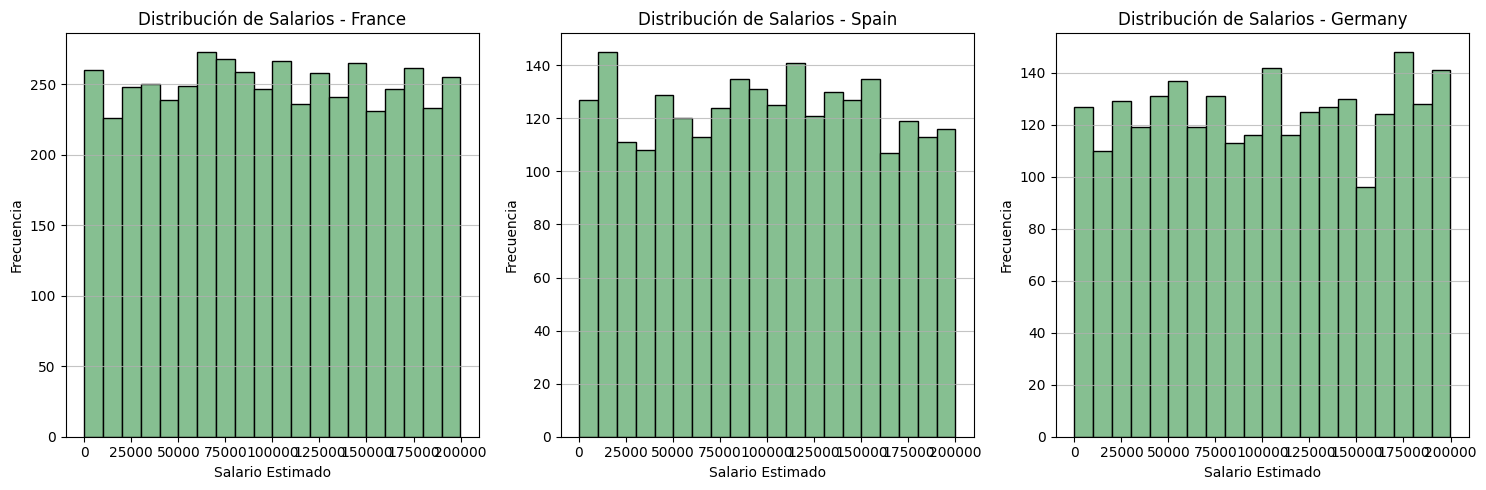

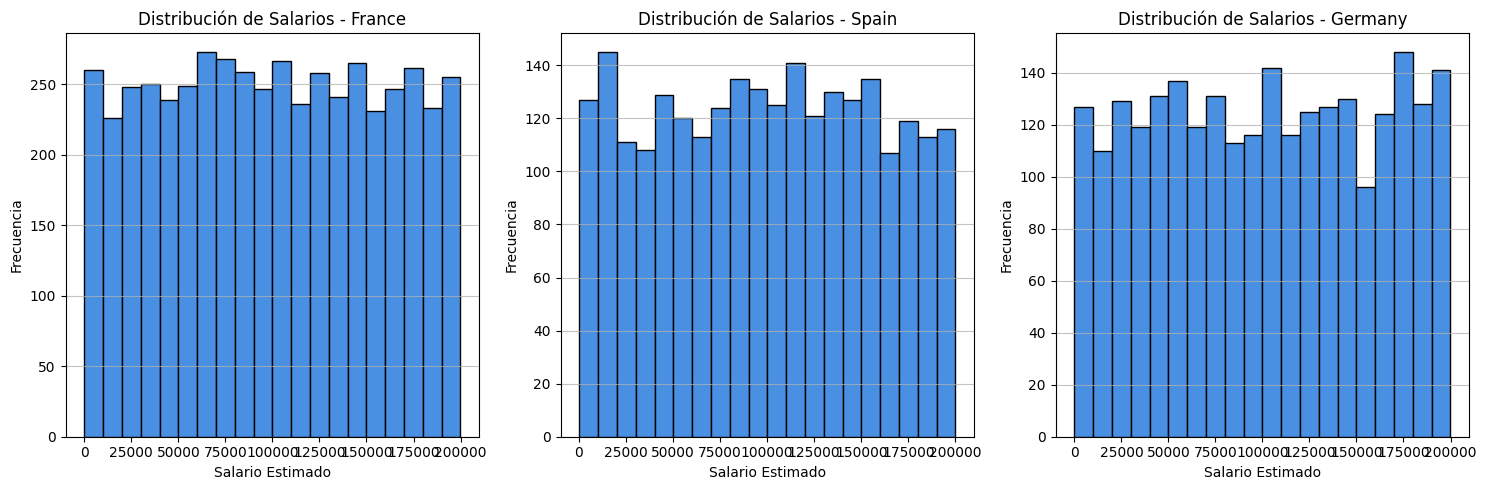

In [14]:
# Obtener la lista de países únicos
paises = df['Geography'].unique()

# Configurar el gráfico
plt.figure(figsize=(15, 5))

# Crear un histograma para cada país
for i, pais in enumerate(paises, 1):
    plt.subplot(1, len(paises), i)
    datos_pais = df[df['Geography'] == pais]['EstimatedSalary']
    plt.hist(datos_pais, bins=20, color='#86bf91', edgecolor='black',)
    plt.title(f'Distribución de Salarios - {pais}')
    plt.xlabel('Salario Estimado')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Configurar el gráfico
plt.figure(figsize=(15, 5))

# Crear un histograma para cada país
for i, pais in enumerate(paises, 1):
    plt.subplot(1, len(paises), i)
    datos_pais = df_simulado[df_simulado['Geography'] == pais]['EstimatedSalary']
    plt.hist(datos_pais, bins=20, color='#4A90E2', edgecolor='black',)
    plt.title(f'Distribución de Salarios - {pais}')
    plt.xlabel('Salario Estimado')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

## Comparacion entre distribuciones normales

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

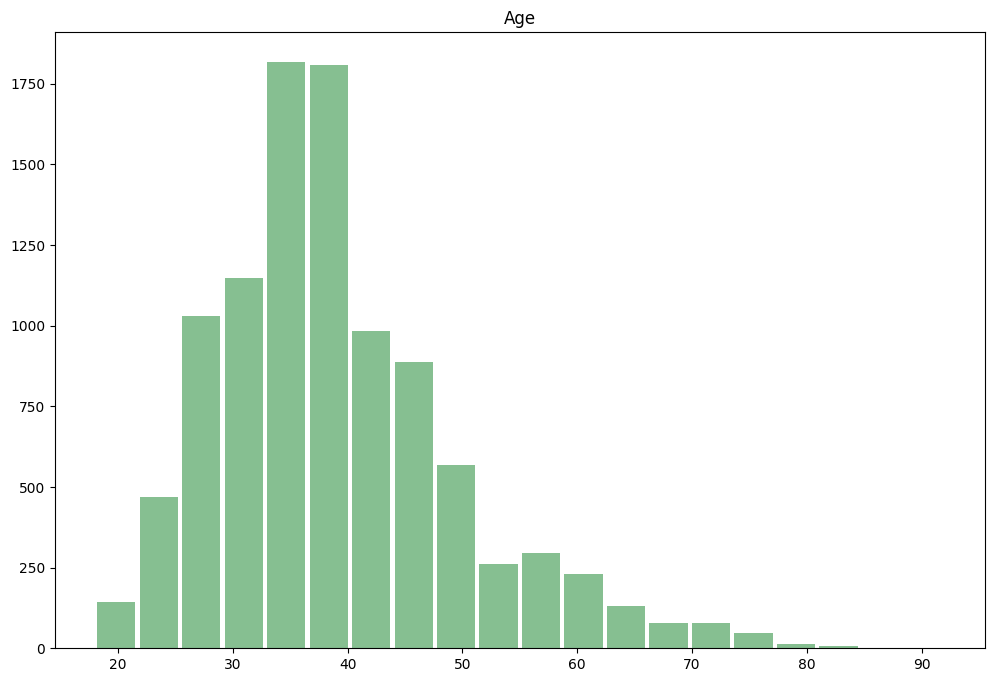

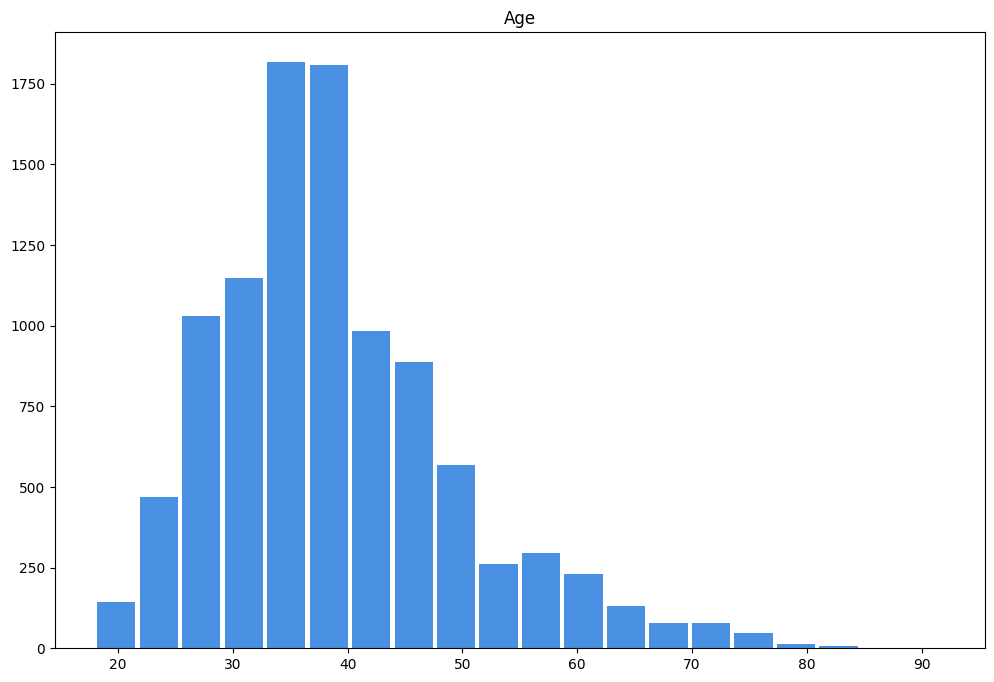

In [15]:
df.hist(column='Age', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='Age', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'CreditScore'}>]], dtype=object)

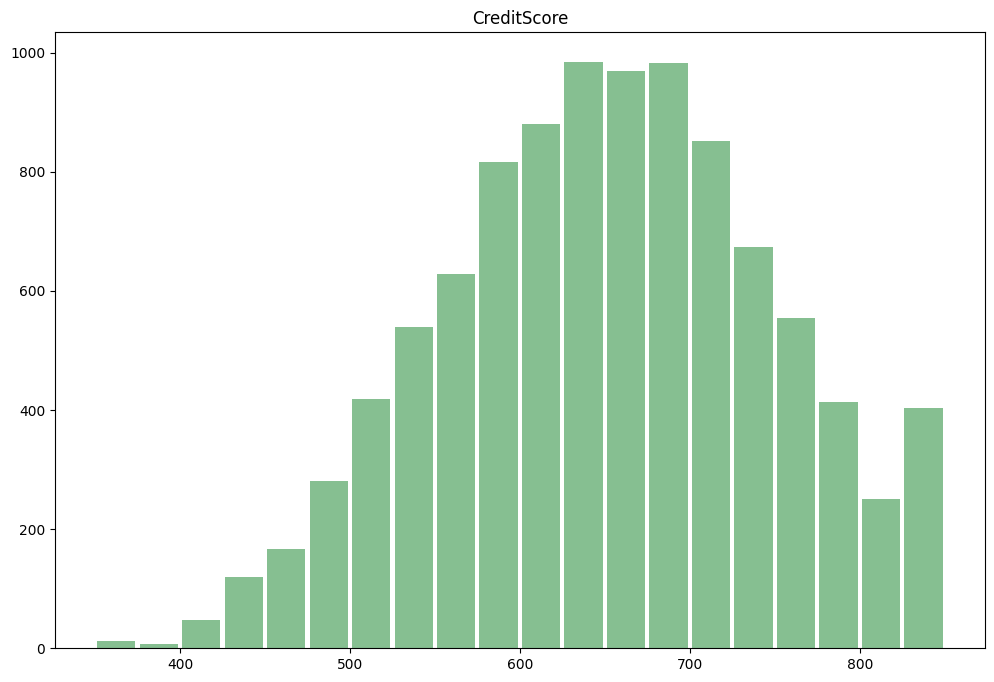

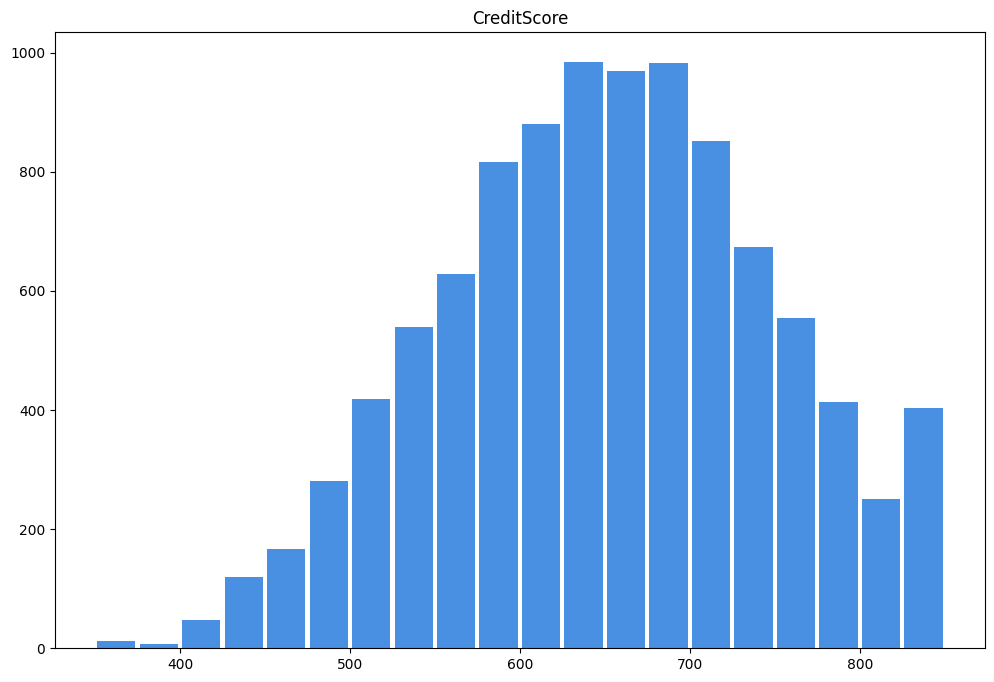

In [16]:
df.hist(column='CreditScore', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='CreditScore', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'Balance'}>]], dtype=object)

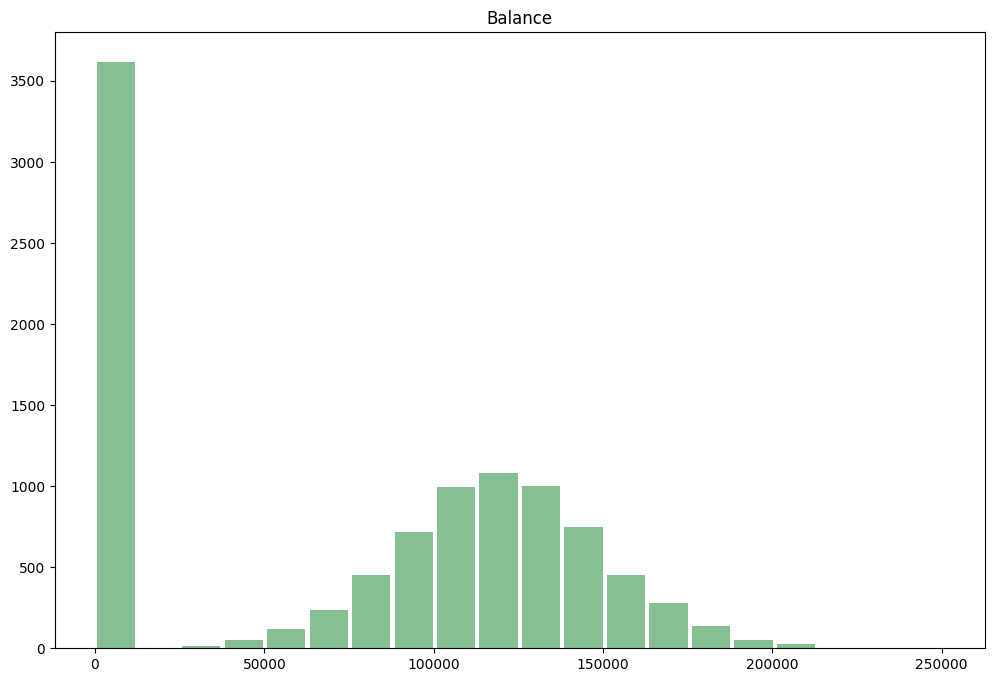

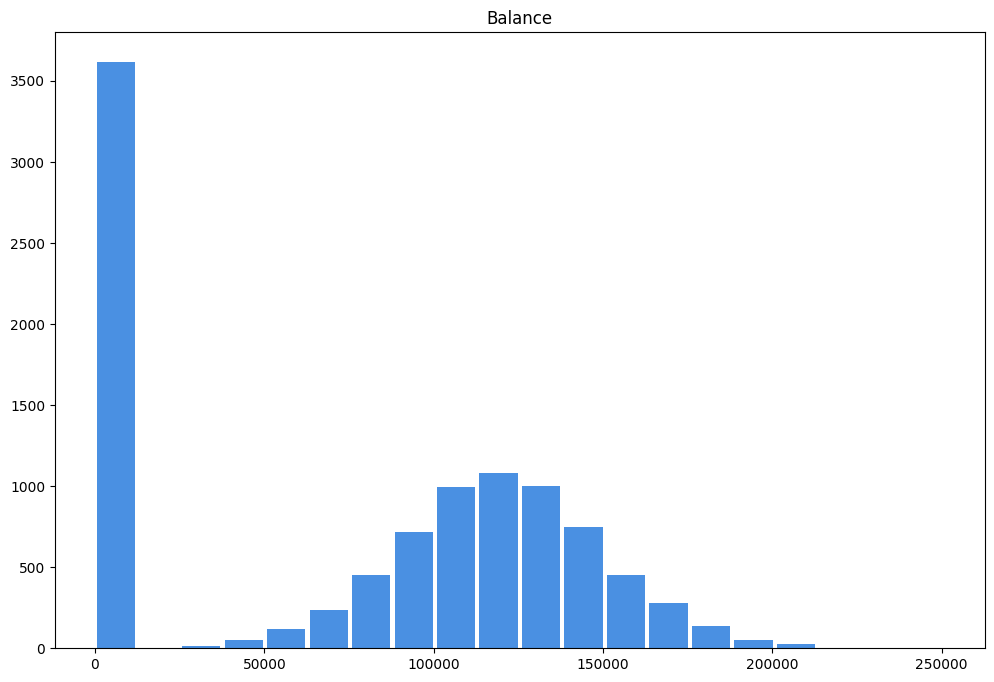

In [17]:
df.hist(column='Balance', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='Balance', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

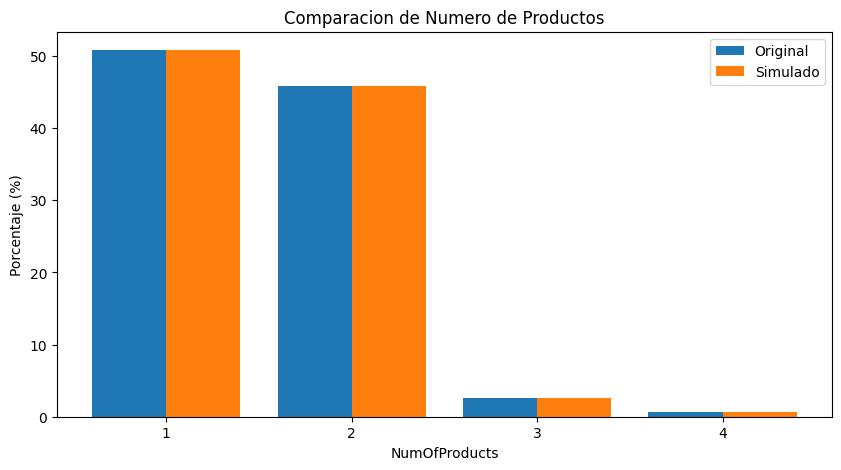

In [19]:
def comparar_barras(df1, df2, columna, nombre1='Original', nombre2='Simulado',title=''):
    """
    Versión simplificada para comparar distribuciones entre dos DataFrames
    """
    # Calcular frecuencias relativas
    dist1 = df1[columna].value_counts(normalize=True).sort_index()
    dist2 = df2[columna].value_counts(normalize=True).sort_index()
    
    # Unir categorías
    categorias = dist1.index.union(dist2.index)
    dist1 = dist1.reindex(categorias, fill_value=0)
    dist2 = dist2.reindex(categorias, fill_value=0)
    
    # Configurar gráfico
    plt.figure(figsize=(10, 5))
    ancho = 0.4
    
    # Posiciones de las barras
    posiciones = range(len(categorias))
    
    plt.bar([p - ancho/2 for p in posiciones], dist1*100, width=ancho, label=nombre1)
    plt.bar([p + ancho/2 for p in posiciones], dist2*100, width=ancho, label=nombre2)
    
    # Personalización básica
    plt.title(f'{title}')
    plt.xlabel(columna)
    plt.ylabel('Porcentaje (%)')
    plt.xticks(posiciones, categorias)
    plt.legend()
    plt.show()

# Ejemplo de uso:
comparar_barras(df, df_simulado, 'NumOfProducts',title='Comparacion de Numero de Productos')

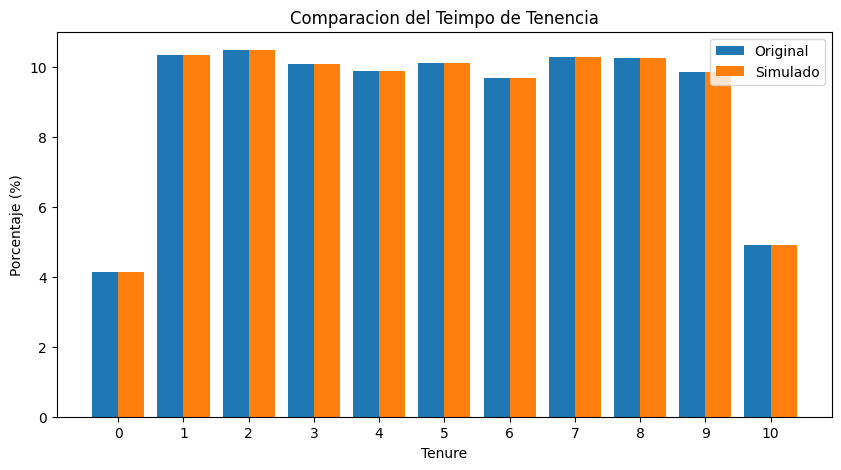

In [22]:
comparar_barras(df, df_simulado, 'Tenure',title='Comparacion del Teimpo de Tenencia')

## Comparacion entre variables categoricas

### Resumen

Las variables categoricas son:

* Geography
* Gender
* HasCrCard
* IsActiveMember
* Exited

La expansion del dataset a 100k de registros implica el expandirlo 10 veces de su tamaño actual y se espera que haya un cambio (Δ) del 1% o inferior por la varianza

In [55]:
"""
Comparar los variables categoricas de forma dinamica
"""
def comparar_distribuciones(original, simulado, columnas):
    """
    Compara distribuciones porcentuales de las variables categorica
    
    Parámetros de Entrada:
    original: DataFrame original
    simulado: DataFrame simulado
    columna: Lista de columnas a comparar
    
    Retorna:
    DataFrame con porcentajes y diferencias 

    La funcion esta diseñada para comparar variables categoricas como el genero
    """
    resultados = []
    
    # Iterar sobre cada columna
    for col in columnas:

        # Calcular distribuciones porcentuales

        #value_counts conteo y normaliza para obtener el porcentaje
        #mul(100) multiplica por 100 para obtener porcentaje
        #round(2) redondea a dos decimales
        
        dist_original = original[col].value_counts(normalize=True).mul(100).round(2)
        dist_simulado = simulado[col].value_counts(normalize=True).mul(100).round(2)
        
        # Unir categorías de ambos datasets
        categorias = dist_original.index.union(dist_simulado.index)
        
        # Crear DataFrame comparativo
        df_temp = pd.DataFrame({
            'Columna': col,
            'Categoría': categorias,
            'Original (%)': dist_original.reindex(categorias, fill_value=0).values,
            'Simulado (%)': dist_simulado.reindex(categorias, fill_value=0).values
        })
        
        # Calcular diferencia porcentual pp(Puntos porcentuales)
        df_temp['Δ (pp)'] = (df_temp['Simulado (%)'] - df_temp['Original (%)']).round(2)
        
        resultados.append(df_temp)
    
    # Combinar todos los resultados
    return pd.concat(resultados).reset_index(drop=True)

In [56]:
# Columnas a comparar
columnas = ['Geography', 
            'Gender', 
            'HasCrCard', 
            'IsActiveMember', 
            'Exited']

# Generar comparación
df_comparacion = comparar_distribuciones(df, df_simulado, columnas)

# Mostrar resultados
print(df_comparacion)

           Columna Categoría  Original (%)  Simulado (%)  Δ (pp)
0        Geography    France         50.14         50.14     0.0
1        Geography   Germany         25.09         25.09     0.0
2        Geography     Spain         24.77         24.77     0.0
3           Gender      Male         54.57         54.57     0.0
4           Gender    Female         45.43         45.43     0.0
5        HasCrCard         1         70.55         70.55     0.0
6        HasCrCard         0         29.45         29.45     0.0
7   IsActiveMember         1         51.51         51.51     0.0
8   IsActiveMember         0         48.49         48.49     0.0
9           Exited         0         79.63         79.63     0.0
10          Exited         1         20.37         20.37     0.0


### Distribuciones

#### Funcion para graficar un grafico de pastel

In [32]:
def PieChart(distribucion, titulo):
    plt.figure(figsize=(8, 6))
    plt.pie(
        distribucion,
        labels=distribucion.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )

    plt.title(titulo, fontsize=15)
    plt.axis('equal')  # Para asegurar que el gráfico sea circular
    plt.show()


#### Genero

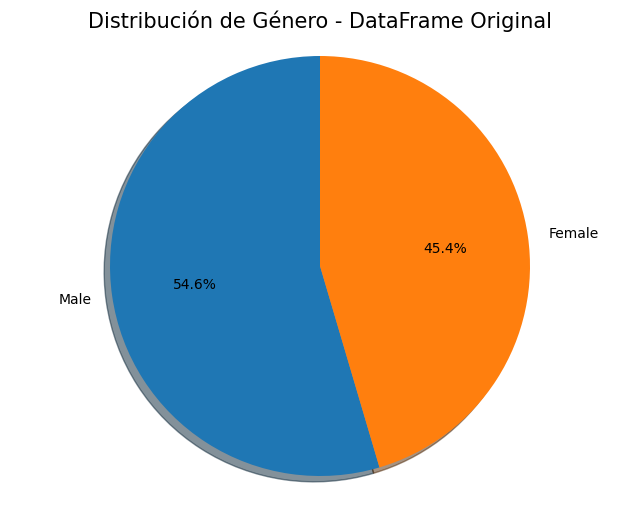

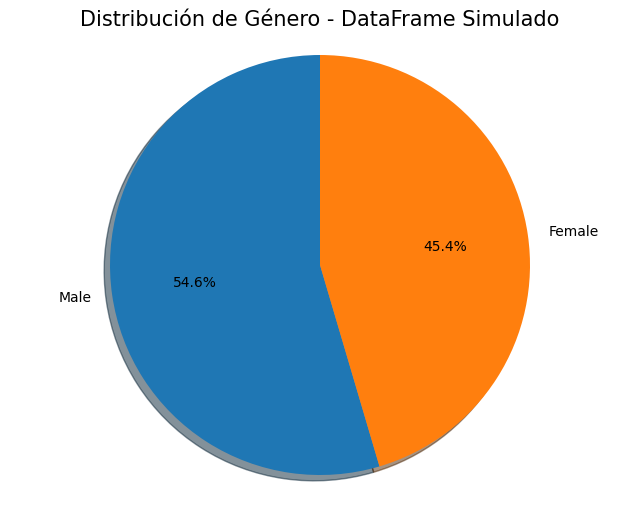

In [24]:
PieChart(df['Gender'].value_counts(), 'Distribución de Género - DataFrame Original')    
PieChart(df_simulado['Gender'].value_counts(), 'Distribución de Género - DataFrame Simulado')    

#### Paises

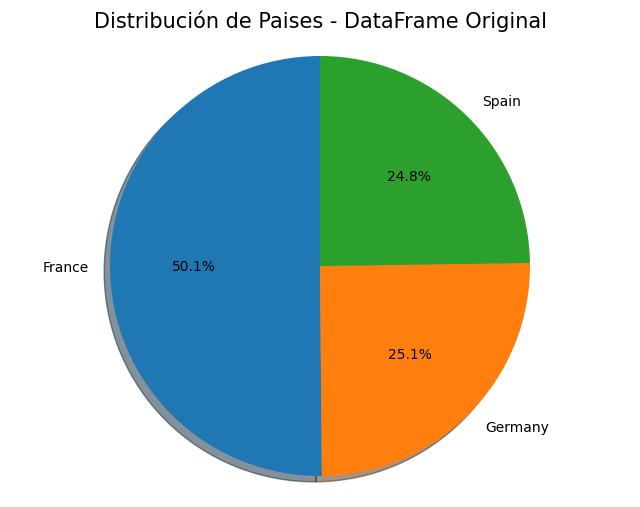

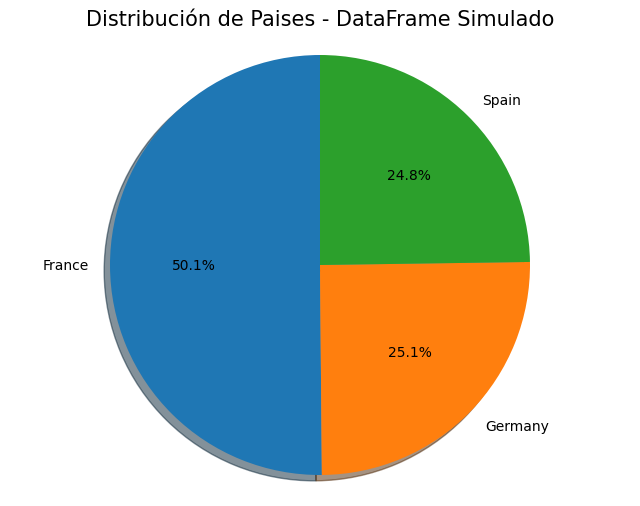

In [27]:
PieChart(df['Geography'].value_counts(), 'Distribución de Paises - DataFrame Original')    
PieChart(df_simulado['Geography'].value_counts(), 'Distribución de Paises - DataFrame Simulado')    

#### Miembros Activos

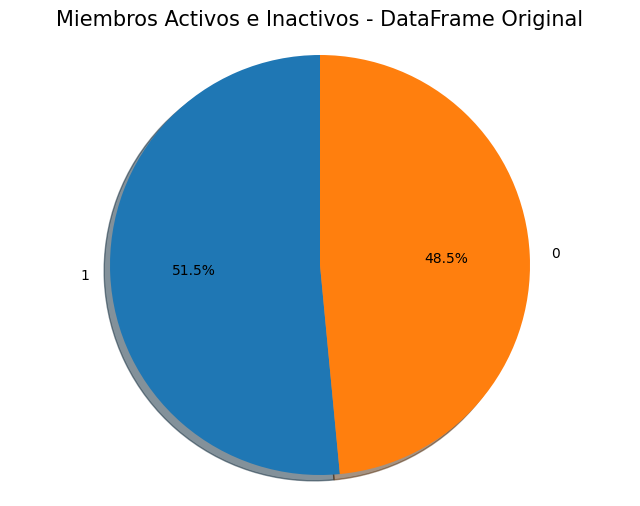

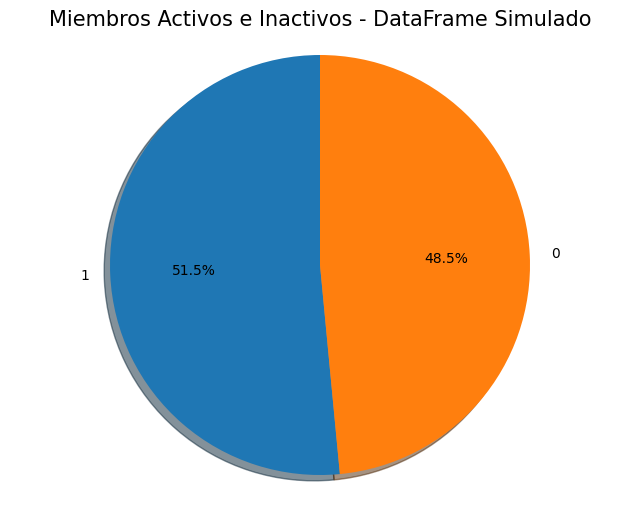

In [26]:
PieChart(df['IsActiveMember'].value_counts(), 'Miembros Activos e Inactivos - DataFrame Original')    
PieChart(df_simulado['IsActiveMember'].value_counts(), 'Miembros Activos e Inactivos - DataFrame Simulado')    

#### Miembros con Tarjetas de Credito

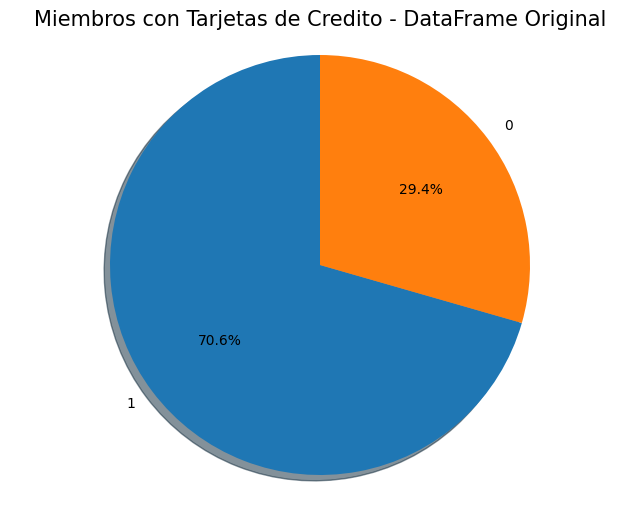

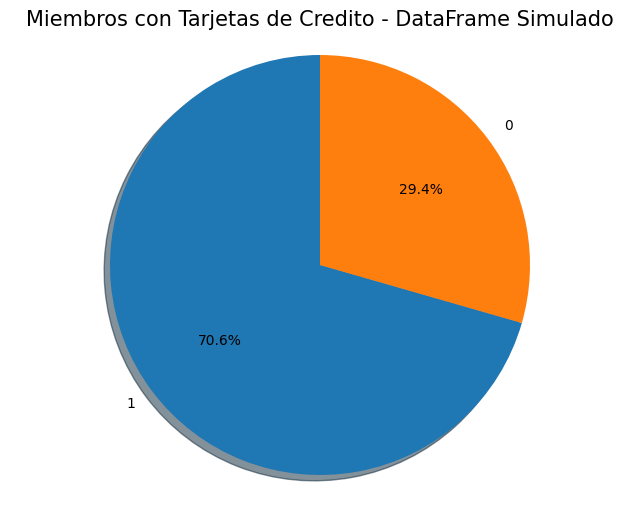

In [29]:
PieChart(df['HasCrCard'].value_counts(), 'Miembros con Tarjetas de Credito - DataFrame Original')    
PieChart(df_simulado['HasCrCard'].value_counts(), 'Miembros con Tarjetas de Credito - DataFrame Simulado')    

#### Miembros que Permanecen a la Empresa

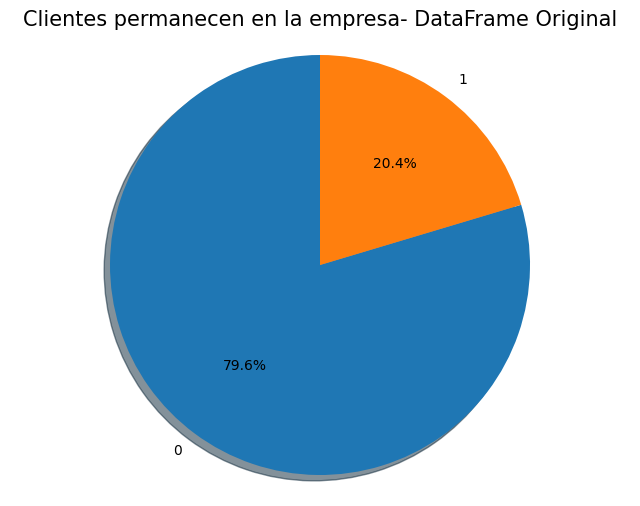

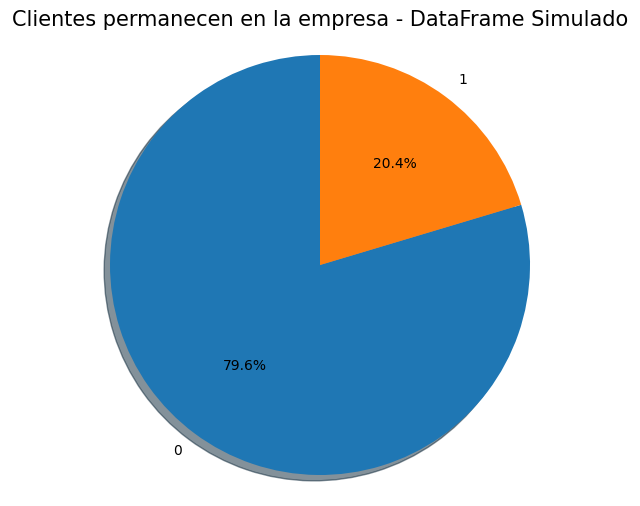

In [31]:
PieChart(df['Exited'].value_counts(), 'Clientes permanecen en la empresa- DataFrame Original')    
PieChart(df_simulado['Exited'].value_counts(), 'Clientes permanecen en la empresa - DataFrame Simulado')  